## Section A

In [3]:
import pandas as pd

# Load the datasets
red_wine = pd.read_csv(r'C:\Users\idoya\Downloads\sectionE-bonus-task2-data\winequality-red.csv', delimiter=';')
white_wine = pd.read_csv(r'C:\Users\idoya\Downloads\sectionE-bonus-task2-data\winequality-white.csv', delimiter=';')

# Display the first few rows of each dataset
print("Red Wine Data:")
print(red_wine.head())
print("\nWhite Wine Data:")
print(white_wine.head())


Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

## Distribution of Wine Quality Scores

c:\Users\idoya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idoya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


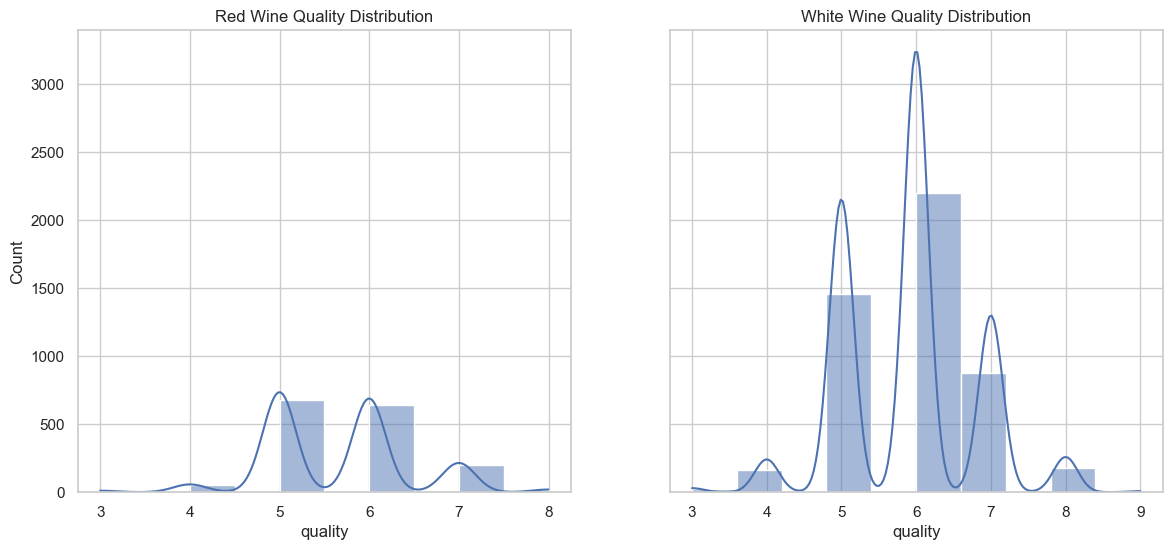

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of wine quality scores
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(red_wine['quality'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Red Wine Quality Distribution')
sns.histplot(white_wine['quality'], bins=10, kde=True, ax=axes[1])
axes[1].set_title('White Wine Quality Distribution')
plt.show()


## Correlation Between Physicochemical Properties and Wine Quality


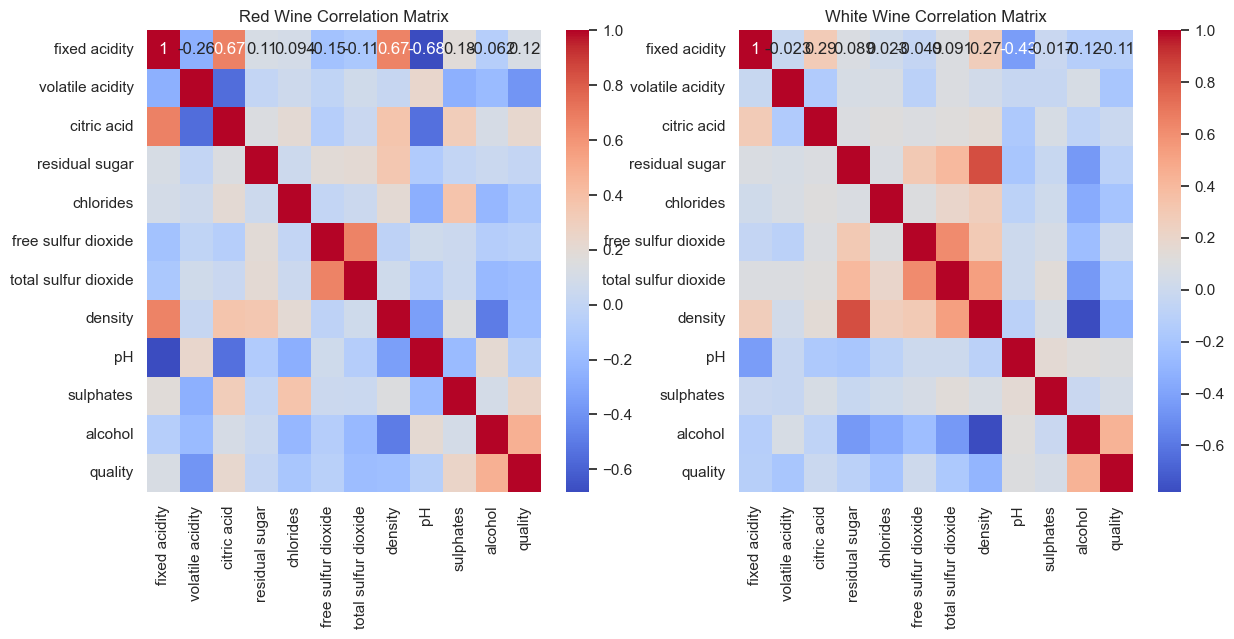

In [5]:
# Calculate the correlation matrices
red_corr = red_wine.corr()
white_corr = white_wine.corr()

# Plot the heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(red_corr, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Red Wine Correlation Matrix')
sns.heatmap(white_corr, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('White Wine Correlation Matrix')
plt.show()


### Alcohol Content vs. Quality

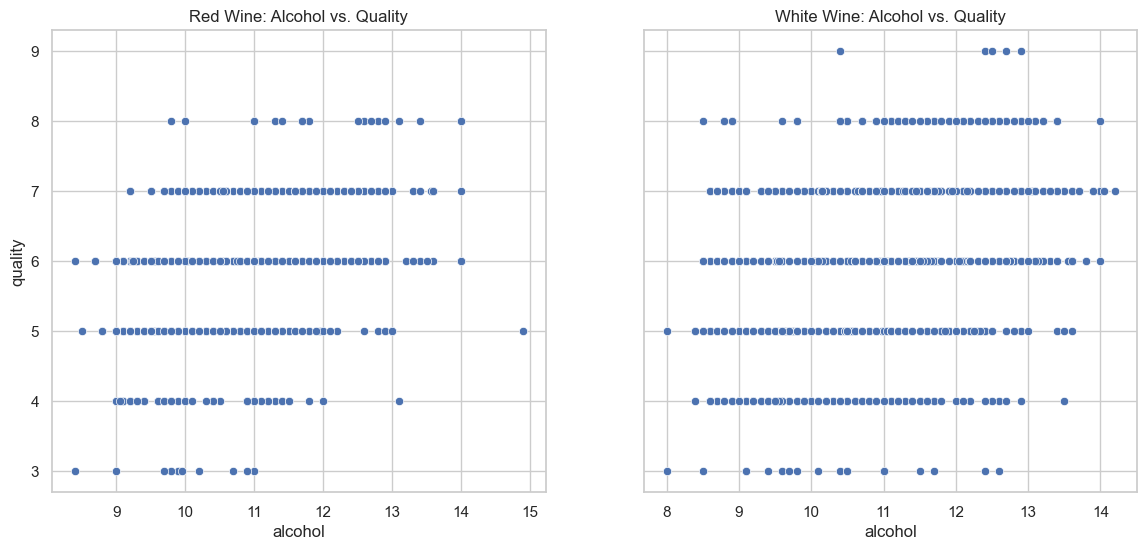

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.scatterplot(x='alcohol', y='quality', data=red_wine, ax=axes[0])
axes[0].set_title('Red Wine: Alcohol vs. Quality')
sns.scatterplot(x='alcohol', y='quality', data=white_wine, ax=axes[1])
axes[1].set_title('White Wine: Alcohol vs. Quality')
plt.show()


### pH vs. Quality

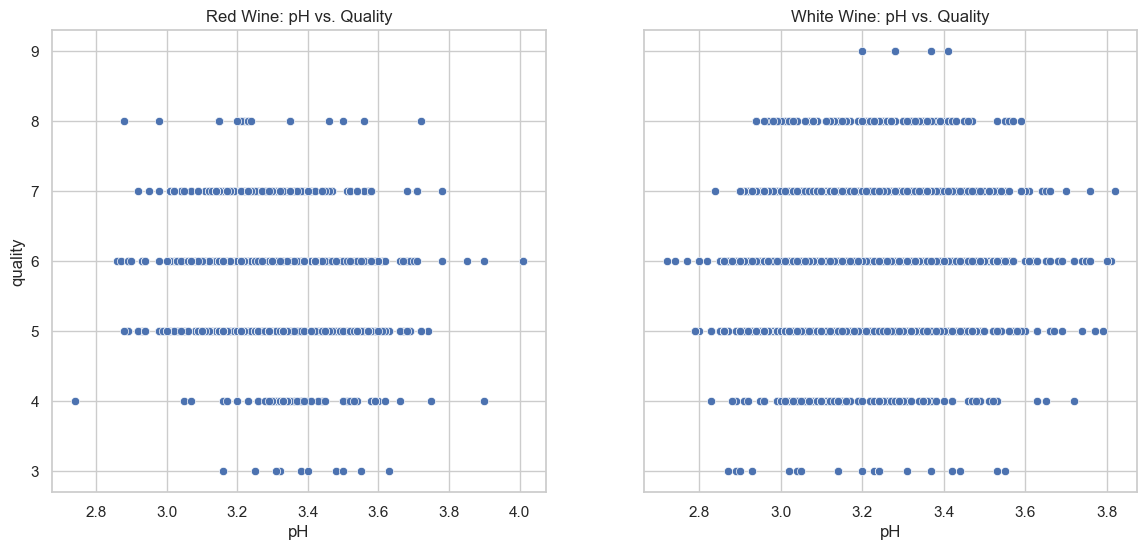

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.scatterplot(x='pH', y='quality', data=red_wine, ax=axes[0])
axes[0].set_title('Red Wine: pH vs. Quality')
sns.scatterplot(x='pH', y='quality', data=white_wine, ax=axes[1])
axes[1].set_title('White Wine: pH vs. Quality')
plt.show()

### Sulphates vs. Quality

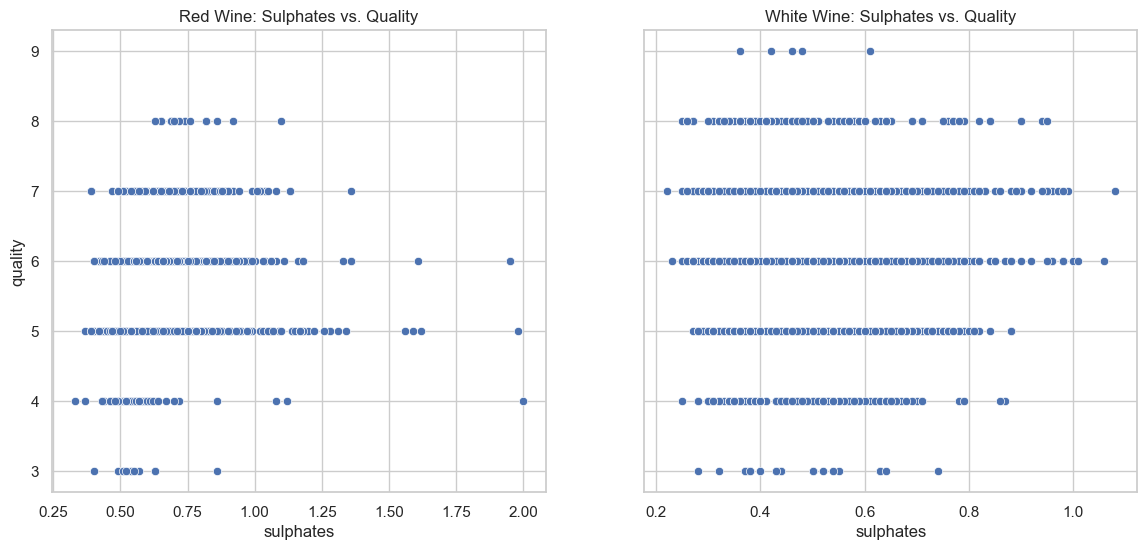

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.scatterplot(x='sulphates', y='quality', data=red_wine, ax=axes[0])
axes[0].set_title('Red Wine: Sulphates vs. Quality')
sns.scatterplot(x='sulphates', y='quality', data=white_wine, ax=axes[1])
axes[1].set_title('White Wine: Sulphates vs. Quality')
plt.show()

### Data Pre-processing

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the data
red_wine_scaled = pd.DataFrame(scaler.fit_transform(red_wine), columns=red_wine.columns)
white_wine_scaled = pd.DataFrame(scaler.fit_transform(white_wine), columns=white_wine.columns)

# Display the first few rows of the normalized data
print("Normalized Red Wine Data:")
print(red_wine_scaled.head())
print("\nNormalized White Wine Data:")
print(white_wine_scaled.head())


Normalized Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.15

## Creating a Categorical Wine Quality Feature

In [10]:
# Define the function to categorize wine quality
def categorize_quality(quality):
    if quality <= 4:
        return 'Low'
    elif quality <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization
red_wine_scaled['quality_cat'] = red_wine_scaled['quality'].apply(categorize_quality)
white_wine_scaled['quality_cat'] = white_wine_scaled['quality'].apply(categorize_quality)

# Display the distribution of the new categorical feature
print("Red Wine Quality Categories:")
print(red_wine_scaled['quality_cat'].value_counts())
print("\nWhite Wine Quality Categories:")
print(white_wine_scaled['quality_cat'].value_counts())


Red Wine Quality Categories:
quality_cat
Low    1599
Name: count, dtype: int64

White Wine Quality Categories:
quality_cat
Low    4898
Name: count, dtype: int64


## Section B